<a href="https://colab.research.google.com/github/HarshvAh/Regression/blob/main/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

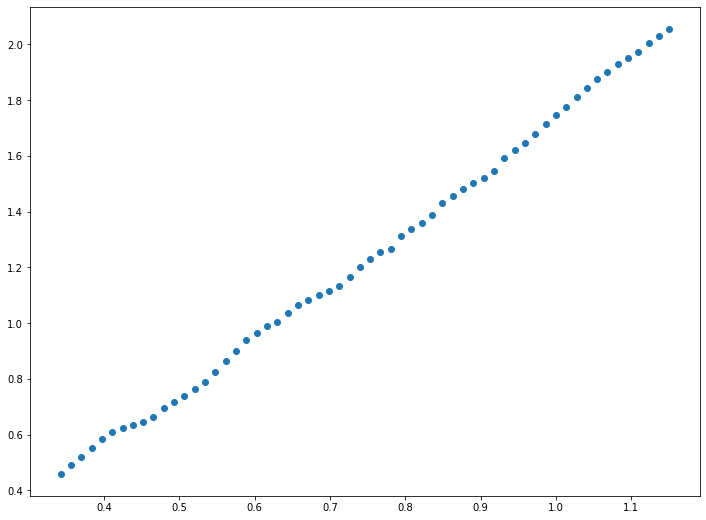

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (12.0, 9.0)
#data=pd.read_csv("MA_covid_data.csv")
data=pd.read_csv("AL_covid_data.csv")
extension=15
startIndex=25
endIndex=85
extendStartIndex=25-extension
extendEndIndex=85+extension
x_scalefactor=(0.2*startIndex+0.8*endIndex)
y_scalefactor=10000
x_start=data.iloc[extendStartIndex:startIndex,0]
y_start=data.iloc[extendStartIndex:startIndex,1]
x=data.iloc[startIndex:endIndex,0]
y=data.iloc[startIndex:endIndex,1]
x_end=data.iloc[endIndex:extendEndIndex,0]
y_end=data.iloc[endIndex:extendEndIndex,1]
x_start=x_start-2
x=x-2
x_end=x_end-2
#Y=np.log(y)
X=np.divide(x,x_scalefactor)
Y=np.log(np.divide(y,y_scalefactor))
#print(x)
plt.scatter(X,Y)
plt.show()

In [35]:
#y=g*x^6+f*x^5+e*x^4 + a*x^3 + b*x^2 + c*x + d
g=0
f=0
e=0
a=0
b=0
c=0
d=0
m=len(X)
alpha=0.08
for i in range(15000) :
  #algeb_diff=sum(f*X*X*X*X*X+e*X*X*X*X+a*X*X*X+b*X*X+c*X+d-Y)
  D_g = sum(X*X*X*X*X*X*(g*X*X*X*X*X*X+f*X*X*X*X*X+e*X*X*X*X+a*X*X*X+b*X*X+c*X+d-Y))/m
  D_f = sum(X*X*X*X*X*(g*X*X*X*X*X*X+f*X*X*X*X*X+e*X*X*X*X+a*X*X*X+b*X*X+c*X+d-Y))/m
  D_e = sum(X*X*X*X*(g*X*X*X*X*X*X+f*X*X*X*X*X+e*X*X*X*X+a*X*X*X+b*X*X+c*X+d-Y))/m
  D_a = sum(X*X*X*(g*X*X*X*X*X*X+f*X*X*X*X*X+e*X*X*X*X+a*X*X*X+b*X*X+c*X+d-Y))/m
  D_b = sum(X*X*(g*X*X*X*X*X*X+f*X*X*X*X*X+e*X*X*X*X+a*X*X*X+b*X*X+c*X+d-Y))/m
  D_c = sum(X*(g*X*X*X*X*X*X+f*X*X*X*X*X+e*X*X*X*X+a*X*X*X+b*X*X+c*X+d-Y))/m
  D_d = sum(g*X*X*X*X*X*X+f*X*X*X*X*X+e*X*X*X*X+a*X*X*X+b*X*X+c*X+d-Y)/m
  tmp_g = g-alpha*D_g
  tmp_f = f-alpha*D_f
  tmp_e = e-alpha*D_e
  tmp_a = a-alpha*D_a
  tmp_b = b-alpha*D_b
  tmp_c = c-alpha*D_c
  tmp_d = d-alpha*D_d
  #if abs(tmp_e-e)<errthr and abs(tmp_a-a)<errthr and abs(tmp_b-b)<errthr and abs(tmp_c-c)<errthr and abs(tmp_d-d)<errthr :
   # break
  g=tmp_g
  f=tmp_f
  e=tmp_e
  a=tmp_a
  b=tmp_b
  c=tmp_c
  d=tmp_d

print(f'{g} {f} {e} {a} {b} {c} {d}')

-0.09864820354280442 -0.09032685312890977 0.034645460763659486 0.2916858570032863 0.6413937327210866 0.8537255680818346 0.12014093111229385


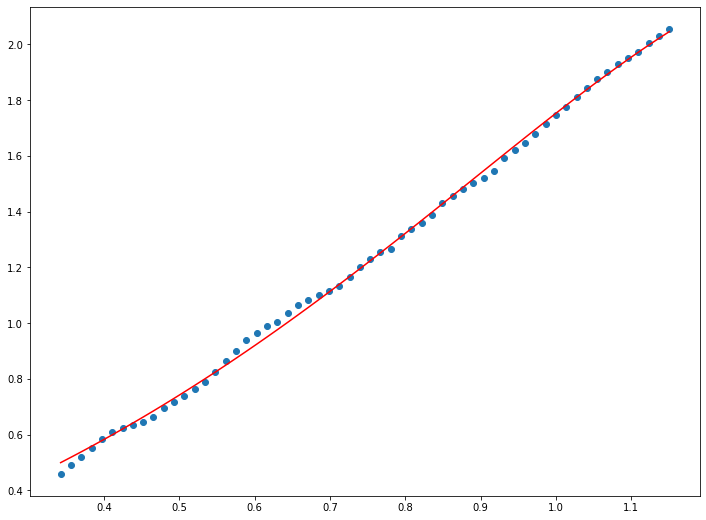

In [36]:
estimates=g*X*X*X*X*X*X+f*X*X*X*X*X+e*X*X*X*X+a*X*X*X+b*X*X+c*X+d
plt.rcParams['figure.figsize'] = (12.0, 9.0)
plt.plot(X,estimates,color='red')
plt.scatter(X,Y)

# New section

dict_keys([24, 85, 23, 86, 22, 87, 21, 88, 20, 89, 19, 90, 18, 91, 17, 92, 16, 93, 15, 94, 14, 95, 13, 96, 12, 97, 11, 98])
{24: 16167.90798379883, 85: 79151.56798981034, 23: 15870.552261481487, 86: 80932.82751630583, 22: 15583.898277794455, 87: 82680.69716001932, 21: 15307.516881955265, 88: 84385.98833907668, 20: 15040.996237941436, 89: 86038.92198638544, 19: 14783.941233407904, 90: 87629.15493671516, 18: 14535.972893781673, 91: 89145.81724671632, 17: 14296.727803756563, 92: 90577.5614889539, 16: 14065.857538046512, 93: 91912.62498609096, 15: 13843.0281029326, 94: 93138.90583720054, 14: 13627.919389852921, 95: 94244.05343012932, 13: 13420.224642032017, 96: 95215.57392769578, 12: 13219.649934924646, 97: 96040.95095793242, 11: 13025.913671053917, 98: 96707.78142736637}


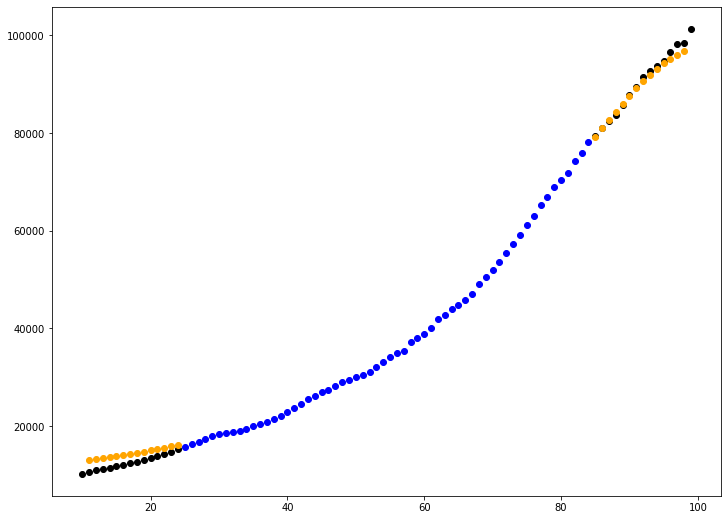

In [37]:
#prediction
import math
def predict(x) :
  #print(math.exp(f*x*x*x*x*x+e*x*x*x*x+a*x*x*x+b*x*x+c*x+d))
  return y_scalefactor*(math.exp(g*x*x*x*x*x*x+f*x*x*x*x*x+e*x*x*x*x+a*x*x*x+b*x*x+c*x+d)) 
covid_data_predictions={}
for i in range(1,extension) :
  covid_data_predictions[(startIndex-i)]=predict((startIndex-i)/x_scalefactor)
  covid_data_predictions[(endIndex+i-1)]=predict((endIndex+i-1)/x_scalefactor)

print(covid_data_predictions.keys())
plt.scatter(x_start,y_start,color='black')
plt.scatter(x,y,color='blue')
plt.scatter(x_end,y_end,color='black')
print(covid_data_predictions)
plt.scatter(covid_data_predictions.keys(),covid_data_predictions.values(),color='orange')